## <font color='green'> Digital content and entertainment industry </font>

In [82]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb


### <font color='green'>Import and analyse the data set </font>

The  Dataset  of  50,000  movie  reviews  from  IMDB,  labelled  by sentiment  (positive/negative).  Reviews  have  been  preprocessed,  and  each  review  is encoded  as  a  sequence  of  word  indexes  (integers).  For  convenience,  the  words  are indexed  by  their  frequency  in  the  dataset,  meaning  the  for  that  has  index  1  is  the most  frequent  word.  Use  the first  20  words  from  each  review  to  speed  up  training, using  a  max  vocabulary  size  of  10,000.  As  a  convention,  "0"  does  not  stand  for  a specific word, but instead is used to encode any unknown word

**_num_words=10000:**
***Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept.***

In [83]:
_num_words=10000
(X_train,y_train),(X_test,y_test) =imdb.load_data(num_words=_num_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [84]:
len(X_test)

25000

**By Default, imdb.load_data loads the train and test data into 50-50 split. I will combine these and later split the data into 80-20 ratio**

### <font color='green'>Print shape of features and labels</font>

In [85]:
print("The unique classes are (Positive/Negative)):", np.unique(y_train))
print("Number of unique words:", len(np.unique(np.hstack(X_train+X_test))))

The unique classes are (Positive/Negative)): [0 1]
Number of unique words: 9998


In [86]:
print("Shape of features:",X_train.shape)
print("Shape of labels:",y_train.shape)

Shape of features: (25000,)
Shape of labels: (25000,)


In [87]:
from statistics import mean
Average_len = [len(X_train[i]) for i in range(0,len(X_train))]
print("Average length of Review comments :",mean(Average_len))

Average length of Review comments : 238.71364


### <font color='green'>Print value of any one feature and it's label</font>

In [88]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [89]:
print(y_train[0])

1


### <font color='green'>Decode the feature value to get original sentence</font>

In [90]:
index=imdb.get_word_index()

In [91]:
reverse_index=dict((value,key) for (key,value) in index.items())

**We need to do a "i-3", as the first indices are reserved.**

In [92]:
print(" ".join([reverse_index.get(i-3, "#") for i in X_train[0]] ))

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### <font color='green'>Perform relevant sequence adding on the data</font>

**Since we are using 20  words  from  each  review  to  speed  up  training, we will trim each review to take only first 20 words. However, reviews which are shorter than this, needs to be padded with 0s to make them of consistent length.**

In [93]:
_maxlen=20
X_train=sequence.pad_sequences(X_train,maxlen=_maxlen,padding='pre')
X_test=sequence.pad_sequences(X_test,maxlen=_maxlen,padding='pre')

### <font color='green'>Design, train, tune and test a sequential model</font>

**Combining the default splilts and spliting the data into 80-20 ratio**

In [94]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [95]:
X_train=X[10000:]
y_train=y[10000:]
X_test=X[:10000]
y_test=y[:10000]

In [96]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((40000, 20), (40000,), (10000, 20), (10000,))

**Checking Data balance**

In [97]:
unique, counts = np.unique(y_train, return_counts=True)
uniqueTest, countsTest = np.unique(y_test, return_counts=True)
print (np.asarray((unique, counts,uniqueTest, countsTest)).T)

[[    0 20053     0  4947]
 [    1 19947     1  5053]]


**Embedding Layer:** Consist of two layers internally - One hot encoding layer followed by a Dense Layer.
_num_words : vocabulary size, Embedding Size is 50 (Each word will be converted into 50 indices)
input_length: The number of features in a sample (i.e. number of words in each document)

**Dropout Layer:** Regularization technique that works by randomly ignoring a certain percentage of nodes from a layer. This helps to reduce overfitting to the training data. A dropout layer will typically have 20 to 50 percent of nodes ignored.

**Dense Layer(s):**  The number of nodes and activation function are given as arguments.

**Output Layer:** I am using sigmoid function at the final layer. Our output classes are either 0 or 1.

In [98]:
embedding_size=50
model = Sequential()
model.add(Embedding( _num_words , embedding_size, input_length=_maxlen))
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

**There are 616,481 weights, all of them are trainable. Huge number of weights an result into overfitting.**

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               91648     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [100]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))


Epoch 1/20
1250/1250 [==============================] - 62s 48ms/step - loss: 0.5220 - accuracy: 0.7339 - val_loss: 0.4590 - val_accuracy: 0.7742
Epoch 2/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.4266 - accuracy: 0.7969 - val_loss: 0.4516 - val_accuracy: 0.7780
Epoch 3/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.3894 - accuracy: 0.8195 - val_loss: 0.4506 - val_accuracy: 0.7817
Epoch 4/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.3581 - accuracy: 0.8363 - val_loss: 0.4740 - val_accuracy: 0.7826
Epoch 5/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.3337 - accuracy: 0.8491 - val_loss: 0.4728 - val_accuracy: 0.7823
Epoch 6/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.3102 - accuracy: 0.8631 - val_loss: 0.4877 - val_accuracy: 0.7850
Epoch 7/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.2932 - accuracy: 0.8708 - val_loss: 0.5109 -

**Plot Loss and Accuracy for Validation and Training**

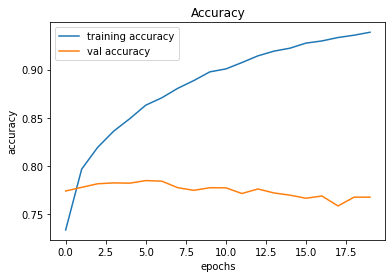

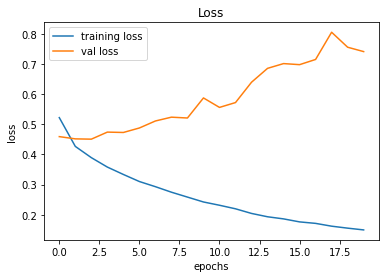

In [101]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

**This model was able to predict the sentiment of movie reviews with 93.87% accuracy. Increasing the number of unique words or maximum length of a review can improve the performance.**

### <font color='green'>Use the designed model to print the prediction on any one sample</font>

In [102]:
prediction=model.predict(X_test)
prediction=np.argmax(prediction,axis=1)

In [103]:
y_test[1],prediction[1]

(0, 0)

### <font color='green'>Testing a Pre-Trained Model</font>

In [104]:
import gensim.downloader as api

In [105]:
#Load Glove model (similar to Word2Vec)
glove_model = api.load('glove-wiki-gigaword-50')

In [106]:
embedding_vector_length = glove_model.vector_size
embedding_matrix = np.zeros((_num_words + 1, embedding_vector_length))
for word, i in sorted(index.items(),key=lambda x:x[1]):
    if i > (_num_words+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [107]:
embedding_vector_length

50

In [108]:
embedding_size=50
model = Sequential()
model.add(Embedding( _num_words +1, embedding_vector_length,weights=[embedding_matrix], trainable=False,input_length=_maxlen))
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 50)            500050    
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               91648     
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [110]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))


Epoch 1/20
1250/1250 [==============================] - 53s 41ms/step - loss: 0.6915 - accuracy: 0.5217 - val_loss: 0.6861 - val_accuracy: 0.5405
Epoch 2/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.6818 - accuracy: 0.5462 - val_loss: 0.6603 - val_accuracy: 0.5831
Epoch 3/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.6659 - accuracy: 0.5727 - val_loss: 0.6432 - val_accuracy: 0.6104
Epoch 4/20
1250/1250 [==============================] - 50s 40ms/step - loss: 0.6550 - accuracy: 0.5899 - val_loss: 0.6300 - val_accuracy: 0.6252
Epoch 5/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.6449 - accuracy: 0.6030 - val_loss: 0.6151 - val_accuracy: 0.6471
Epoch 6/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.6366 - accuracy: 0.6166 - val_loss: 0.6043 - val_accuracy: 0.6532
Epoch 7/20
1250/1250 [==============================] - 51s 40ms/step - loss: 0.6308 - accuracy: 0.6249 - val_loss: 0.6069 -

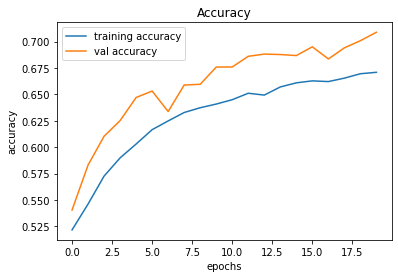

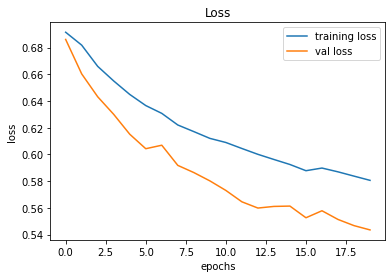

In [114]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

**The train and validation accuracy and loss followed almost the same function.**